In [1]:
from getdist import loadMCSamples
import numpy as np
import matplotlib.pyplot as plt

## Number of Samples

In [ ]:
n_train_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [ ]:
path_class = '../../cobaya/class_TTTEEE_2/'
samples_class = loadMCSamples(path_class, settings={'ignore_rows':0.1})
means_class = np.array(samples_class.getMeans()[:6])
sigmas_class = np.array(np.sqrt(samples_class.getVars()[:6]))

In [ ]:
means = []
sigmas = []
for n_train in n_train_list:
    path = '../../cobaya/looti_TTTEEE_5sigma_%i/chains/' %(n_train)
    samples = loadMCSamples(path, settings={'ignore_rows':0.1})
    means.append(samples.getMeans()[:6])
    sigmas.append(np.sqrt(samples.getVars()[:6]))
means_ntrain = np.array(means)
sigmas_ntrain = np.array(sigmas)

In [ ]:
params = [ r'$A_{s}$', r'$H_{0}$', r'$n_{s}$', r'$\omega_{b}$', r'$\omega_{cdm}$', r'$\tau_{reio}$']

bias_list = []
sigmas_list = []
for means_n, sigmas_n in zip(means, sigmas):
    temp_bias = []
    temp_sigmas = []
    for index in range(len(means_n)):
        # if index == 0:
        #     print(index, params[index], means_class[index], means_n[index], sigmas_class[index])
        bias = (means_class[index] - means_n[index]) / sigmas_class[index]
        temp_bias.append(bias)
        sigma = (sigmas_class[index]- sigmas_n[index]) / sigmas_class[index]
        temp_sigmas.append(sigma)
    bias_list.append(temp_bias)
    sigmas_list.append(temp_sigmas)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12,5))
fig.set_tight_layout(tight=True)

for index, param in enumerate(params):
    if index == 0:
        # class mean----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(n_train_list, means_class[index]*np.ones(len(n_train_list)), 
                                color='cornflowerblue', label=r'CLASS mean: $\mu_{C}$')
        # class std.dev.
        axs.ravel()[index].fill_between(n_train_list, (means_class[index] - sigmas_class[index])*np.ones(len(n_train_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(n_train_list)), 
                                        alpha=0.4, color='lightsteelblue', label=r'CLASS std.dev.: $\sigma_{C}$')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(n_train_list, means_ntrain[:,index], 
                                   marker='o', color='royalblue', label=r'Emulator mean: $\mu_{E}$')
        # emulator std.dev.
        axs.ravel()[index].errorbar(n_train_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue', label=r'Emulator std.dev.: $\sigma_{E}$')
        
        # y-limit to unify plots-----------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(n_train_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], 
                     color='firebrick', label=r'$\mu$ bias: $(\mu_{C} - \mu_{E}) / \sigma_{C}$')
        ax_temp.plot(n_train_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], 
                     color='lightcoral', label=r'$\sigma$ bias: $(\sigma_{C} - \sigma_{E}) / \sigma_{C}$')

    else:
        # class mean-----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(n_train_list, means_class[index]*np.ones(len(n_train_list)), color='cornflowerblue')
        # class std.dev.
        axs.ravel()[index].fill_between(n_train_list, (means_class[index] - sigmas_class[index])*np.ones(len(n_train_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(n_train_list)), 
                                        alpha=0.4, color='lightsteelblue')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(n_train_list, means_ntrain[:,index], marker='o', color='royalblue')
        # emulator std.dev.
        axs.ravel()[index].errorbar(n_train_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue')
        
        # y-limit to unify plots------------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(n_train_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], color='firebrick')
        ax_temp.plot(n_train_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], color='lightcoral')
        
    # labels------------------------------------------------------------------------------------------
    ax_temp.set_ylabel('Bias', color='firebrick', fontsize=14)
    ax_temp.tick_params(axis='y', colors='firebrick', labelsize=12)
    ax_temp.set_ylim([-0.15, 0.15])

    axs.ravel()[index].set_ylabel(param, color='royalblue', fontsize=14)
    axs.ravel()[index].tick_params(axis='y', colors='royalblue', labelsize=12)
    axs.ravel()[index].set_xticks(n_train_list)
    axs.ravel()[index].set_xticklabels([])

# legend, x-lables, title------------------------------------------------------------------------------
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.035), ncol=3, fancybox=True, fontsize=13)
axs.ravel()[-1].set_xlabel('Size of Training Dataset', fontsize=14)
axs.ravel()[-1].set_xticklabels(n_train_list, fontsize=12)
axs.ravel()[-2].set_xlabel('Size of Training Dataset', fontsize=14)
axs.ravel()[-2].set_xticklabels(n_train_list, fontsize=12)
fig.suptitle('MCMC Results: Comparison CLASS vs. Emulators with Different Training Dataset Size', y=1.075, fontsize=18) #, **csfont

# saving-----------------------------------------------------------------------------------------------
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_ntrain_5sigma_npca20_new.pdf', bbox_inches='tight')
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_ntrain_5sigma_npca20_new.png', bbox_inches='tight')
print('')

In [ ]:
from getdist import loadMCSamples
import numpy as np
import matplotlib.pyplot as plt

## Number of PCA components

In [ ]:
n_pca_list = [5, 10, 15, 20]

In [ ]:
path_class = '../../cobaya/class_TTTEEE_2/'
samples_class = loadMCSamples(path_class, settings={'ignore_rows':0.1})
means_class = np.array(samples_class.getMeans()[:6])
sigmas_class = np.array(np.sqrt(samples_class.getVars()[:6]))

In [ ]:
means = []
sigmas = []
for n_pca in n_pca_list:
    path = '../../cobaya/looti_TTTEEE_5sigma_500_npca%i/chains/' %(n_pca)
    samples = loadMCSamples(path, settings={'ignore_rows':0.1})
    means.append(samples.getMeans()[:6])
    sigmas.append(np.sqrt(samples.getVars()[:6]))
means_ntrain = np.array(means)
sigmas_ntrain = np.array(sigmas)

In [ ]:
params = [ r'$A_{s}$', r'$H_{0}$', r'$n_{s}$', r'$\omega_{b}$', r'$\omega_{cdm}$', r'$\tau_{reio}$']

bias_list = []
sigmas_list = []
for means_n, sigmas_n in zip(means, sigmas):
    temp_bias = []
    temp_sigmas = []
    for index in range(len(means_n)):
        # if index == 0:
        #     print(index, params[index], means_class[index], means_n[index], sigmas_class[index])
        bias = (means_class[index] - means_n[index]) / sigmas_class[index]
        temp_bias.append(bias)
        sigma = (sigmas_class[index]- sigmas_n[index]) / sigmas_class[index]
        temp_sigmas.append(sigma)
    bias_list.append(temp_bias)
    sigmas_list.append(temp_sigmas)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12,5))
fig.set_tight_layout(tight=True)

for index, param in enumerate(params):
    if index == 0:
        # class mean----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(n_pca_list, means_class[index]*np.ones(len(n_pca_list)), 
                                color='cornflowerblue', label=r'CLASS mean: $\mu_{C}$')
        # class std.dev.
        axs.ravel()[index].fill_between(n_pca_list, (means_class[index] - sigmas_class[index])*np.ones(len(n_pca_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(n_pca_list)), 
                                        alpha=0.4, color='lightsteelblue', label=r'CLASS std.dev.: $\sigma_{C}$')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(n_pca_list, means_ntrain[:,index], 
                                   marker='o', color='royalblue', label=r'Emulator mean: $\mu_{E}$')
        # emulator std.dev.
        axs.ravel()[index].errorbar(n_pca_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue', label=r'Emulator std.dev.: $\sigma_{E}$')
        
        # y-limit to unify plots-----------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(n_pca_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], 
                     color='firebrick', label=r'$\mu$ bias: $(\mu_{C} - \mu_{E}) / \sigma_{C}$')
        ax_temp.plot(n_pca_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], 
                     color='lightcoral', label=r'$\sigma$ bias: $(\sigma_{C} - \sigma_{E}) / \sigma_{C}$')

    else:
        # class mean-----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(n_pca_list, means_class[index]*np.ones(len(n_pca_list)), color='cornflowerblue')
        # class std.dev.
        axs.ravel()[index].fill_between(n_pca_list, (means_class[index] - sigmas_class[index])*np.ones(len(n_pca_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(n_pca_list)), 
                                        alpha=0.4, color='lightsteelblue')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(n_pca_list, means_ntrain[:,index], marker='o', color='royalblue')
        # emulator std.dev.
        axs.ravel()[index].errorbar(n_pca_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue')
        
        # y-limit to unify plots------------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(n_pca_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], color='firebrick')
        ax_temp.plot(n_pca_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], color='lightcoral')
        
    # labels------------------------------------------------------------------------------------------
    ax_temp.set_ylabel('Bias', color='firebrick', fontsize=14)
    ax_temp.tick_params(axis='y', colors='firebrick', labelsize=12)
    ax_temp.set_ylim([-0.6, 0.6])

    axs.ravel()[index].set_ylabel(param, color='royalblue', fontsize=14)
    axs.ravel()[index].tick_params(axis='y', colors='royalblue', labelsize=12)
    axs.ravel()[index].set_xticks(n_pca_list)
    axs.ravel()[index].set_xticklabels([])

# legend, x-lables, title------------------------------------------------------------------------------
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.035), ncol=3, fancybox=True, fontsize=13)
axs.ravel()[-1].set_xlabel('Number of PCA Components', fontsize=14)
axs.ravel()[-1].set_xticklabels(n_pca_list, fontsize=12)
axs.ravel()[-2].set_xlabel('Number of PCA Components', fontsize=14)
axs.ravel()[-2].set_xticklabels(n_pca_list, fontsize=12)
fig.suptitle('MCMC Results: Comparison CLASS & Emulators with different Number of PCA components', y=1.075, fontsize=18) #, **csfont

# saving-----------------------------------------------------------------------------------------------
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_npca_5sigma_ntrain500_new.png', bbox_inches='tight')
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_npca_5sigma_ntrain500_new.pdf', bbox_inches='tight')
print('')

In [ ]:
from getdist import loadMCSamples
import numpy as np
import matplotlib.pyplot as plt

## Sigmas

In [ ]:
n_sigmas_list = [5, 6, 7, 8, 9, 10]

In [ ]:
path_class = '../../cobaya/class_TTTEEE_2/'
samples_class = loadMCSamples(path_class, settings={'ignore_rows':0.1})
means_class = np.array(samples_class.getMeans()[:6])
sigmas_class = np.array(np.sqrt(samples_class.getVars()[:6]))

In [ ]:
means = []
sigmas = []
for n_sigmas in n_sigmas_list:
    path = '../../cobaya/looti_TTTEEE_%isigma_500_npca20/chains/' %(n_sigmas)
    samples = loadMCSamples(path, settings={'ignore_rows':0.1})
    means.append(samples.getMeans()[:6])
    sigmas.append(np.sqrt(samples.getVars()[:6]))
means_ntrain = np.array(means)
sigmas_ntrain = np.array(sigmas)

In [ ]:
params = [ r'$A_{s}$', r'$H_{0}$', r'$n_{s}$', r'$\omega_{b}$', r'$\omega_{cdm}$', r'$\tau_{reio}$']

bias_list = []
sigmas_list = []
for means_n, sigmas_n in zip(means, sigmas):
    temp_bias = []
    temp_sigmas = []
    for index in range(len(means_n)):
        # if index == 0:
        #     print(index, params[index], means_class[index], means_n[index], sigmas_class[index])
        bias = (means_class[index] - means_n[index]) / sigmas_class[index]
        temp_bias.append(bias)
        sigma = (sigmas_class[index]- sigmas_n[index]) / sigmas_class[index]
        temp_sigmas.append(sigma)
    bias_list.append(temp_bias)
    sigmas_list.append(temp_sigmas)

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(12,5))
fig.set_tight_layout(tight=True)

for index, param in enumerate(params):
    if index == 0:
        # class mean----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(n_sigmas_list, means_class[index]*np.ones(len(n_sigmas_list)), 
                                color='cornflowerblue', label=r'CLASS mean: $\mu_{C}$')
        # class std.dev.
        axs.ravel()[index].fill_between(n_sigmas_list, (means_class[index] - sigmas_class[index])*np.ones(len(n_sigmas_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(n_sigmas_list)), 
                                        alpha=0.4, color='lightsteelblue', label=r'CLASS std.dev.: $\sigma_{C}$')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(n_sigmas_list, means_ntrain[:,index], 
                                   marker='o', color='royalblue', label=r'Emulator mean: $\mu_{E}$')
        # emulator std.dev.
        axs.ravel()[index].errorbar(n_sigmas_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue', label=r'Emulator std.dev.: $\sigma_{E}$')
        
        # y-limit to unify plots-----------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(n_sigmas_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], 
                     color='firebrick', label=r'$\mu$ bias: $(\mu_{C} - \mu_{E}) / \sigma_{C}$')
        ax_temp.plot(n_sigmas_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], 
                     color='lightcoral', label=r'$\sigma$ bias: $(\sigma_{C} - \sigma_{E}) / \sigma_{C}$')

    else:
        # class mean-----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(n_sigmas_list, means_class[index]*np.ones(len(n_sigmas_list)), color='cornflowerblue')
        # class std.dev.
        axs.ravel()[index].fill_between(n_sigmas_list, (means_class[index] - sigmas_class[index])*np.ones(len(n_sigmas_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(n_sigmas_list)), 
                                        alpha=0.4, color='lightsteelblue')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(n_sigmas_list, means_ntrain[:,index], marker='o', color='royalblue')
        # emulator std.dev.
        axs.ravel()[index].errorbar(n_sigmas_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue')
        
        # y-limit to unify plots------------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(n_sigmas_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], color='firebrick')
        ax_temp.plot(n_sigmas_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], color='lightcoral')
        
    # labels------------------------------------------------------------------------------------------
    ax_temp.set_ylabel('Bias', color='firebrick', fontsize=14)
    ax_temp.tick_params(axis='y', colors='firebrick', labelsize=12)
    ax_temp.set_ylim([-0.16, 0.16])

    axs.ravel()[index].set_ylabel(param, color='royalblue', fontsize=14)
    axs.ravel()[index].tick_params(axis='y', colors='royalblue', labelsize=12)
    axs.ravel()[index].set_xticks(n_sigmas_list)
    axs.ravel()[index].set_xticklabels([])

# legend, x-lables, title------------------------------------------------------------------------------
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.035), ncol=3, fancybox=True, fontsize=13)
axs.ravel()[-1].set_xlabel('Hyperellipse Size', fontsize=14)
axs.ravel()[-1].set_xticklabels([str(nsig)+r"$\sigma$" for nsig in n_sigmas_list], fontsize=12)
axs.ravel()[-2].set_xlabel('Hyperellipse Size', fontsize=14)
axs.ravel()[-2].set_xticklabels([str(nsig)+r"$\sigma$" for nsig in n_sigmas_list], fontsize=12)
fig.suptitle('MCMC Results: Comparison CLASS & Emulator with different Sizes of Sampling Region', y=1.075, fontsize=18) #, **csfont

# saving-----------------------------------------------------------------------------------------------
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_sigma_ntrain500_npca20_new.png', bbox_inches='tight')
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_sigma_ntrain500_npca20_new.pdf', bbox_inches='tight')
print('')

In [2]:
from getdist import loadMCSamples
import numpy as np
import matplotlib.pyplot as plt

## Cube vs Ellipse

In [3]:
looti_list = [1, 2]
lootis = ['Hypercube', 'Hyper-Ellipsoid']
looti_paths = ['../../cobaya/looti_TTTEEE_cube_5sigma_500_npca15/chains/', '../../cobaya/looti_TTTEEE_5sigma_500_npca15/chains/']

In [4]:
path_class = '../../cobaya/class_TTTEEE_2/'
samples_class = loadMCSamples(path_class, settings={'ignore_rows':0.1})
means_class = np.array(samples_class.getMeans()[:6])
sigmas_class = np.array(np.sqrt(samples_class.getVars()[:6]))

In [5]:
means = []
sigmas = []
for path in looti_paths:
    samples = loadMCSamples(path, settings={'ignore_rows':0.1})
    means.append(samples.getMeans()[:6])
    sigmas.append(np.sqrt(samples.getVars()[:6]))
means_ntrain = np.array(means)
sigmas_ntrain = np.array(sigmas)

In [6]:
params = [ r'$A_{s}$', r'$H_{0}$', r'$n_{s}$', r'$\omega_{b}$', r'$\omega_{cdm}$', r'$\tau_{reio}$']

bias_list = []
sigmas_list = []
for means_n, sigmas_n in zip(means, sigmas):
    temp_bias = []
    temp_sigmas = []
    for index in range(len(means_n)):
        # if index == 0:
        #     print(index, params[index], means_class[index], means_n[index], sigmas_class[index])
        bias = (means_class[index] - means_n[index]) / sigmas_class[index]
        temp_bias.append(bias)
        sigma = (sigmas_class[index]- sigmas_n[index]) / sigmas_class[index]
        temp_sigmas.append(sigma)
    bias_list.append(temp_bias)
    sigmas_list.append(temp_sigmas)

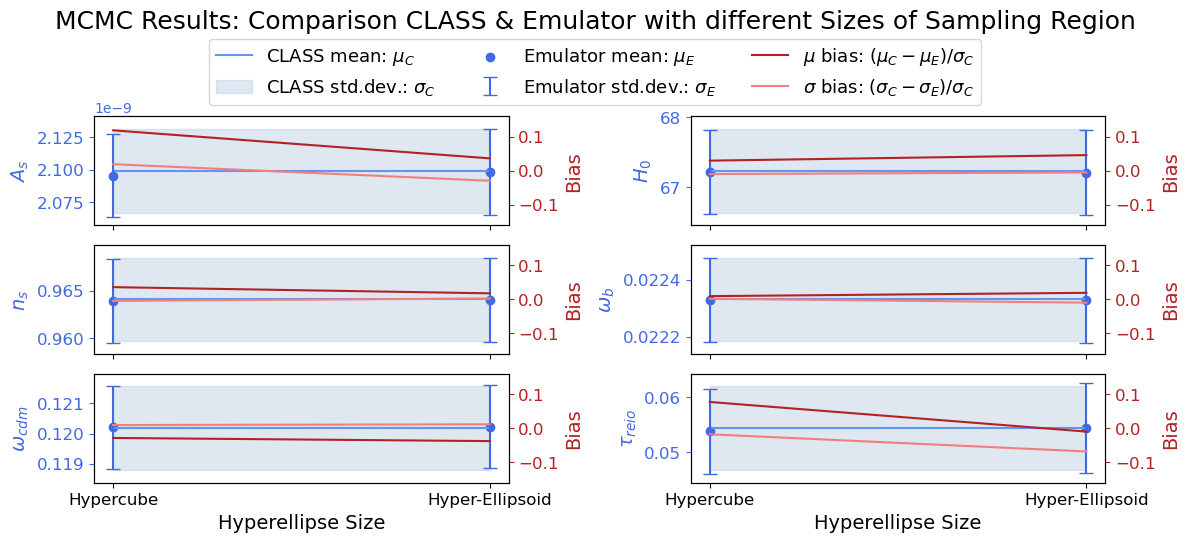

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12,5))
fig.set_tight_layout(tight=True)

for index, param in enumerate(params):
    if index == 0:
        # class mean----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(looti_list, means_class[index]*np.ones(len(looti_list)), 
                                color='cornflowerblue', label=r'CLASS mean: $\mu_{C}$')
        # class std.dev.
        axs.ravel()[index].fill_between(looti_list, (means_class[index] - sigmas_class[index])*np.ones(len(looti_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(looti_list)), 
                                        alpha=0.4, color='lightsteelblue', label=r'CLASS std.dev.: $\sigma_{C}$')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(looti_list, means_ntrain[:,index], 
                                   marker='o', color='royalblue', label=r'Emulator mean: $\mu_{E}$')
        # emulator std.dev.
        axs.ravel()[index].errorbar(looti_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue', label=r'Emulator std.dev.: $\sigma_{E}$')
        
        # y-limit to unify plots-----------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(looti_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], 
                     color='firebrick', label=r'$\mu$ bias: $(\mu_{C} - \mu_{E}) / \sigma_{C}$')
        ax_temp.plot(looti_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], 
                     color='lightcoral', label=r'$\sigma$ bias: $(\sigma_{C} - \sigma_{E}) / \sigma_{C}$')

    else:
        # class mean-----------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].plot(looti_list, means_class[index]*np.ones(len(looti_list)), color='cornflowerblue')
        # class std.dev.
        axs.ravel()[index].fill_between(looti_list, (means_class[index] - sigmas_class[index])*np.ones(len(looti_list)), 
                                        (means_class[index] + sigmas_class[index])*np.ones(len(looti_list)), 
                                        alpha=0.4, color='lightsteelblue')
        
        # emulator mean--------------------------------------------------------------------------------------------------------------
        axs.ravel()[index].scatter(looti_list, means_ntrain[:,index], marker='o', color='royalblue')
        # emulator std.dev.
        axs.ravel()[index].errorbar(looti_list, means_ntrain[:,index], yerr=sigmas_ntrain[:,index], 
                                    fmt='None', capsize=5, color='royalblue')
        
        # y-limit to unify plots------------------------------------------------------------------------------------------------------
        axs.ravel()[index].set_ylim([means_class[index] - 1.3*sigmas_class[index], means_class[index] + 1.3*sigmas_class[index]])

        # secondary y-axis------------------------------------------------------------------------------------------------------------
        ax_temp = axs.ravel()[index].twinx()
        # biases
        ax_temp.plot(looti_list, (means_class[index] - means_ntrain[:,index]) / sigmas_class[index], color='firebrick')
        ax_temp.plot(looti_list, (sigmas_class[index] - sigmas_ntrain[:,index]) / sigmas_class[index], color='lightcoral')
        
    # labels------------------------------------------------------------------------------------------
    ax_temp.set_ylabel('Bias', color='firebrick', fontsize=14)
    ax_temp.tick_params(axis='y', colors='firebrick', labelsize=12)
    ax_temp.set_ylim([-0.16, 0.16])

    axs.ravel()[index].set_ylabel(param, color='royalblue', fontsize=14)
    axs.ravel()[index].tick_params(axis='y', colors='royalblue', labelsize=12)
    axs.ravel()[index].set_xticks(looti_list)
    axs.ravel()[index].set_xticklabels([])

# legend, x-lables, title------------------------------------------------------------------------------
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.035), ncol=3, fancybox=True, fontsize=13)
axs.ravel()[-1].set_xlabel('Hyperellipse Size', fontsize=14)
axs.ravel()[-1].set_xticklabels([looti_str for looti_str in lootis], fontsize=12)
axs.ravel()[-2].set_xlabel('Hyperellipse Size', fontsize=14)
axs.ravel()[-2].set_xticklabels([looti_str for looti_str in lootis], fontsize=12)
fig.suptitle('MCMC Results: Comparison CLASS & Emulator with different Sizes of Sampling Region', y=1.075, fontsize=18) #, **csfont

# saving-----------------------------------------------------------------------------------------------
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_cubeellipse_5sigma_ntrain500_npca15_new.png', bbox_inches='tight')
# plt.savefig('../plots/final_plots/cobaya_class_looti_errorbar_cubeellipse_5sigma_ntrain500_npca15_new.pdf', bbox_inches='tight')
print('')

Notes

In [ ]:

# means = samples.getMeans()[:6]
# vars = samples.getVars()[:6]
# best_fit = samples.getLikeStats().names[0].bestfit_sample
# stds = samples.std(paramVec=list(range(6)))